<h1><center>Лабораторна робота 2.</center></h1>
<h2><center>Візуальний аналіз даних щодо публікацій на Хабрахабр</center></h2>



```
# This is formatted as code
```

**Виконав:** Гринько І.М.

**Варіант:** №6

<a class="anchor" id="lab-2"></a>

## Зміст

1. [Завантаження і знайомство з даними](#lab-2.1)
2. [Завдання](#lab-2.2)

In [2]:
# завантажуємо потрібні бібліотеки

import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6

<a class="anchor" id="lab-2.1"></a>

## <span style="color:blue; font-size:1.2em;">2.1. Завантаження і знайомство з даними</span>

[Повернутися до змісту](#lab-2)

Для лабораторної роботи Вам знадобляться попередньо оформлені дані з навчального конкурсу на Kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs).

In [271]:
howpop_train_url = 'https://raw.githubusercontent.com/radiukpavlo/intelligent-data-analysis/main/02_assignments/ida_lab-02_visual_analysis/howpop_train.csv'

df = pd.read_csv(howpop_train_url)

In [272]:
df.shape

(134137, 17)

In [273]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Відразу відкинемо змінні, назви яких закінчуються на `_lognorm` (потрібні для змагання на Kaggle). Виберемо їх за допомогою `filter()` і видалимо за допомогою `drop`.

In [274]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: стовпці 
        inplace = True) # позбавляє необхідності зберігати набір даних

In [275]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [276]:
# бінарні і категоріальні змінні
df.describe(include = ['object', 'bool']).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [277]:
# налаштування зовнішнього вигляду графіків у seaborn

sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Стовпець **`published`** (час публікації) містить рядки. Для робити з цими даними як з датою/часом публікації, приведемо їх до типу `datetime`.

In [278]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Створимо декілька стовпців на основі даних щодо часу публікації.

In [279]:
df['year'] = df.published.apply(lambda ts: ts.year)
df['month'] = df.published.apply(lambda ts: ts.month)
df['day'] = df.published.apply(lambda ts: ts.day)
df['dayofweek'] = df.published.apply(lambda ts: ts.isoweekday())
df['hour'] = df.published.apply(lambda ts: ts.hour)

-----
<a class="anchor" id="lab-2.2"></a>

## <span style="color:blue; font-size:1.2em;">2.2. Завдання</span>

[Повернутися до змісту](#lab-2)

Дайте відповіді на запитання з використанням інструментів візуалізації.

### <span style="color:red; font-size:1.5em;">Завдання 1</span>

**Для всіх варіантів:**

В якому місяці (і якого року) було найбільше публікацій?

* Березень 2016
* Березень 2015
* Квітень 2015
* Квітень 2016

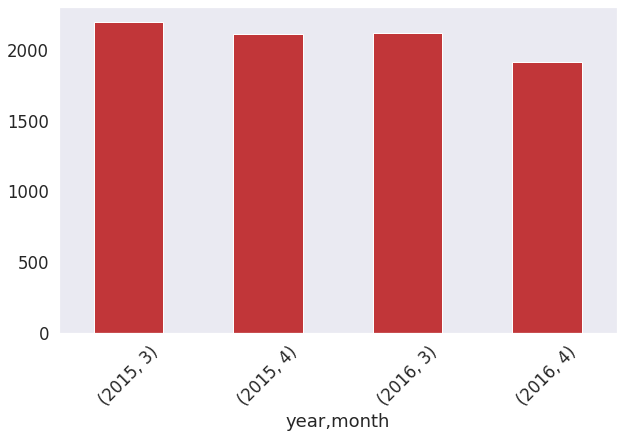

In [280]:
# Ваш код тут
df.query("(year==2016 & month==3) | (year==2015 & month==3)| (year==2015 & month==4)| (year==2016 & month==4)").groupby(["year", "month"])['published'].count().plot(kind='bar', rot=45)

### <span style="color:red; font-size:1.5em;">Завдання 2</span>

**Проаналізуйте публікації в місяці з попереднього питання.**

**Для варіантів 1-5:**

Чи виділяється один або кілька днів від загальної картини публікацій? Якщо так, то в якому дні тижня публікується найбільше/найменше статей?

**Для варіантів 6-10:**

Чи виділяється пора дня від загальної картини публікацій? Якщо так, то в яку пору дня (вказати години) публікується найбільше/найменше статей?

**Для варіантів 11-15:**

Зобразіть порівнняня публікацій на Хабрі та на Гіктаймсі. Чи правда, що на Хабрі щодня більше статей, ніж на Гіктаймсі?

**Для варіантів 16-20:**

Чи правда, що на Хабрі та на Гіктаймсі щосуботи публікують приблизно однакову кількість статей? Подайте відповідь на графіку.

### <span style="color:red; font-size:1.5em;">Завдання 3</span>

**Коли найкраще публікувати статтю? Дайте відповіді на запитання з використанням інструментів візуалізації:**

**Для варіантів 1-5:**

Чи правда, що найбільше переглядів набирають статті, які опубліковані о 14:00?

**Для варіантів 6-10:**

Чи правда, що статті, які опубліковані о 10:00, набирають найбільше коментарів?

**Для варіантів 11-15:**

Чи правда, що найменше переглядів набирають статті, які опубліковані о 6:00?

**Для варіантів 16-20:**

Чи правда, що на Хабрі денні (12:00 - 18:59) статті коментують частіше, ніж вечірні (19:00 - 23:59)?

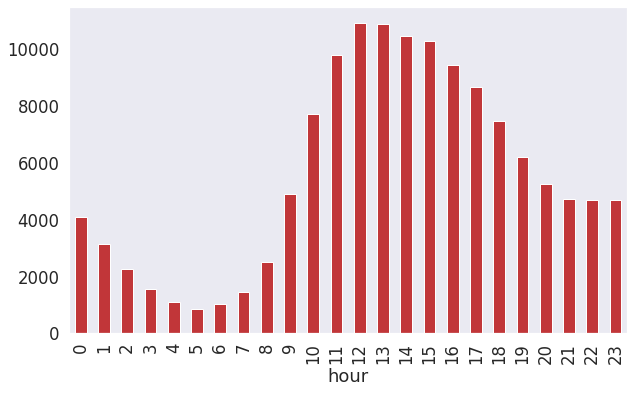

In [281]:
# Ваш код тут
df.groupby('hour')['comments'].count().plot.bar()

### <span style="color:red; font-size:1.5em;">Завдання 4</span>

**Виконайте аналітику кращих авторів з допомопогою інструментів візуалізації:**

**Для варіантів 1-5:**

Виведіть топ-10 авторів з найбільшою кількістю статей (сума статей) за днями тижня.

**Для варіантів 6-10:**

Виведіть топ-10 авторів з найбільшою кількістю переглядів (сума переглядів) за днями тижня.

**Для варіантів 11-15:**

Виведіть топ-10 авторів з найбільшою кількістю коментарів (сума коментарів), які збирають їхні статті, за днями тижня.

**Для варіантів 16-20:**

Виведіть топ-10 авторів, які отримали найбільше плюсів (сума плюсів) за свої публікації, за днями тижня.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


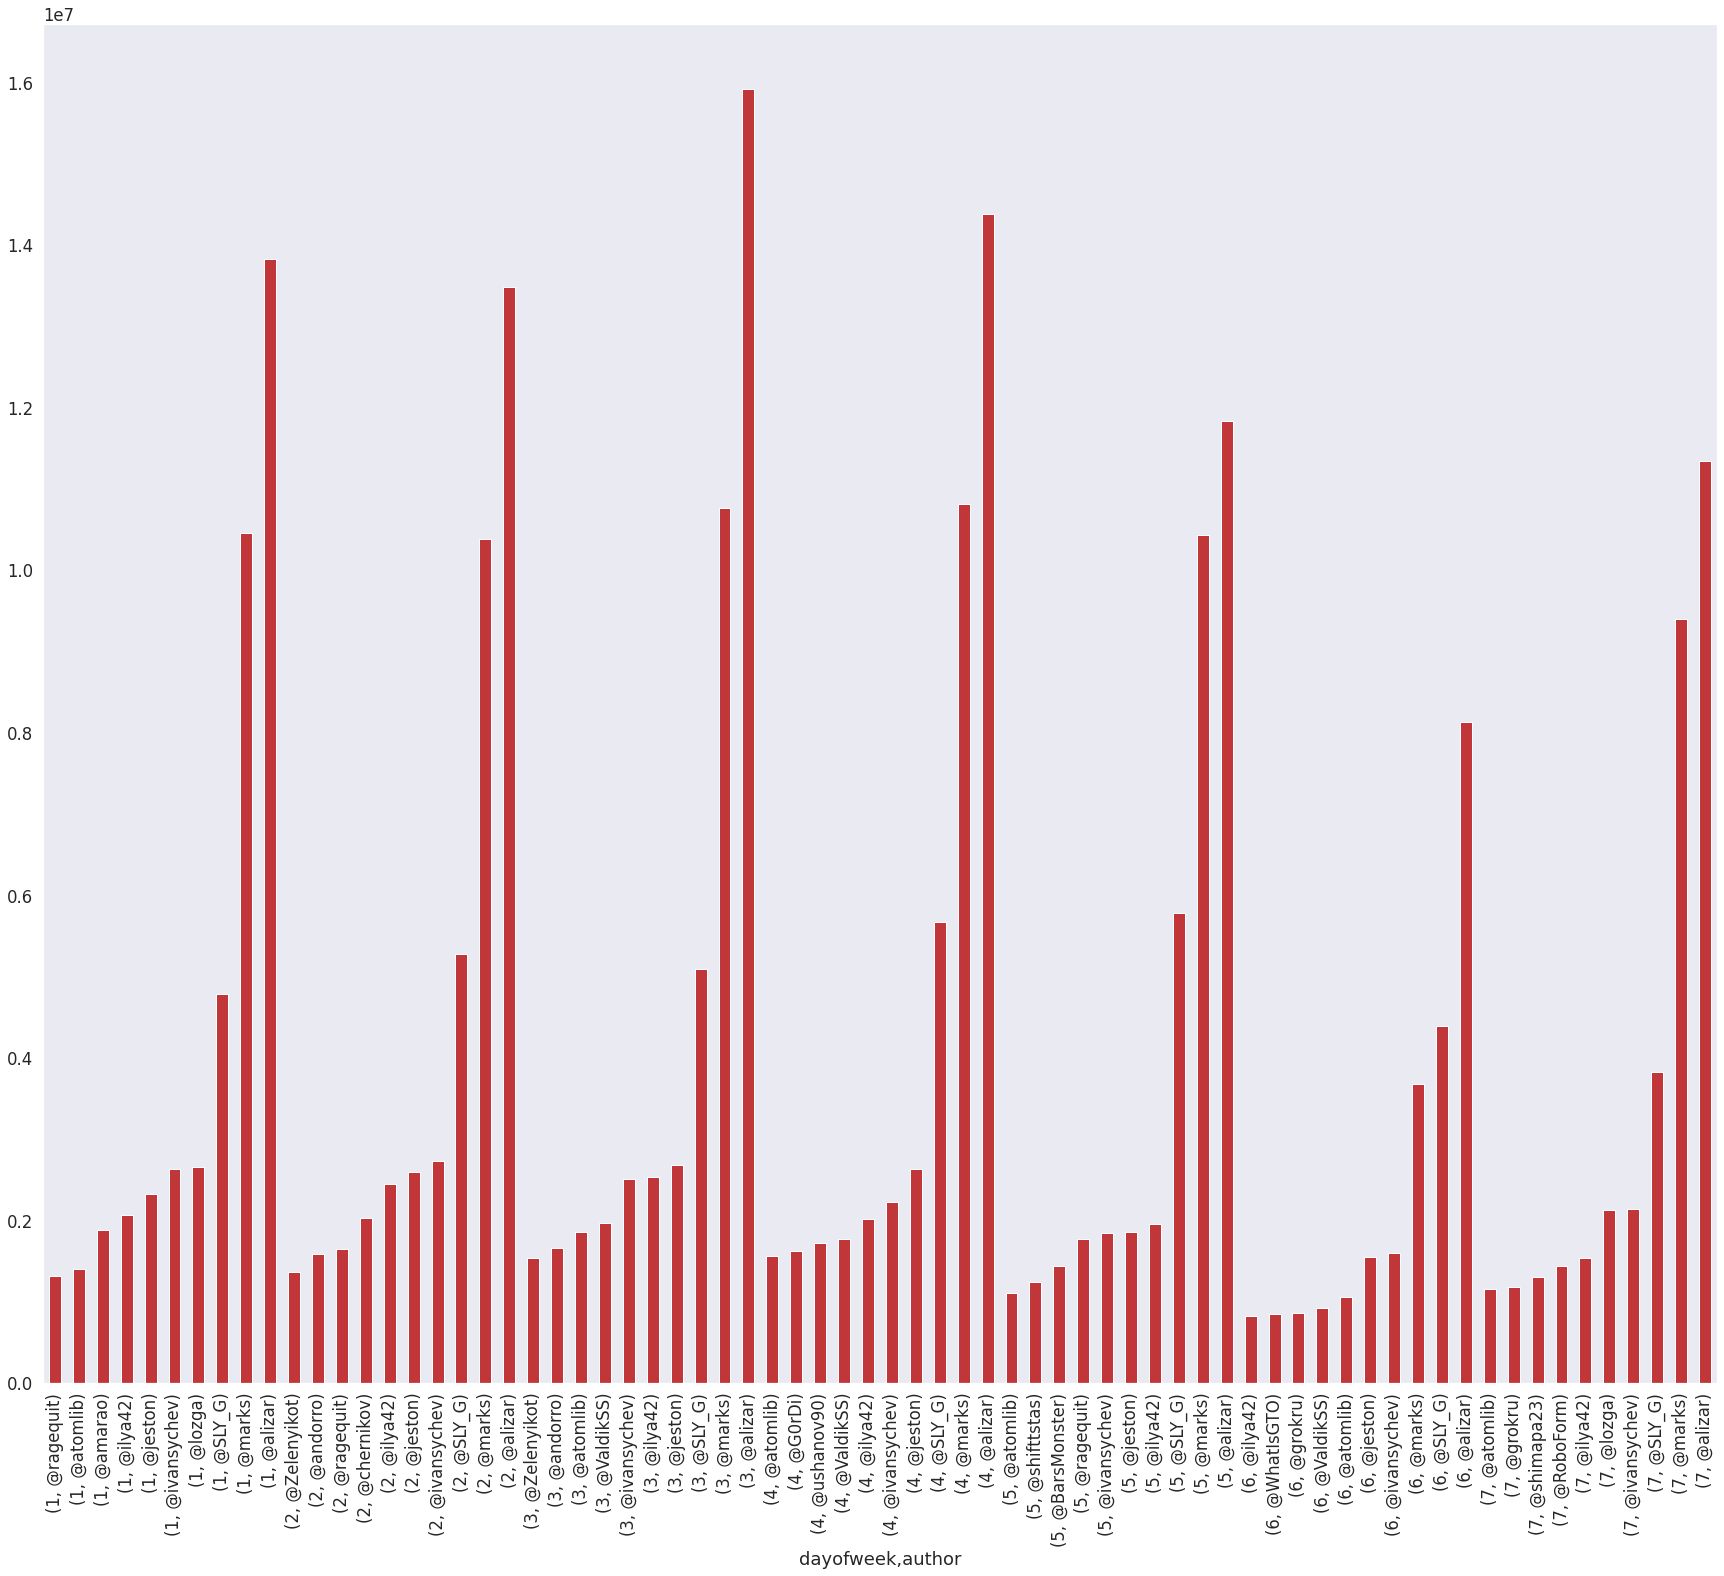

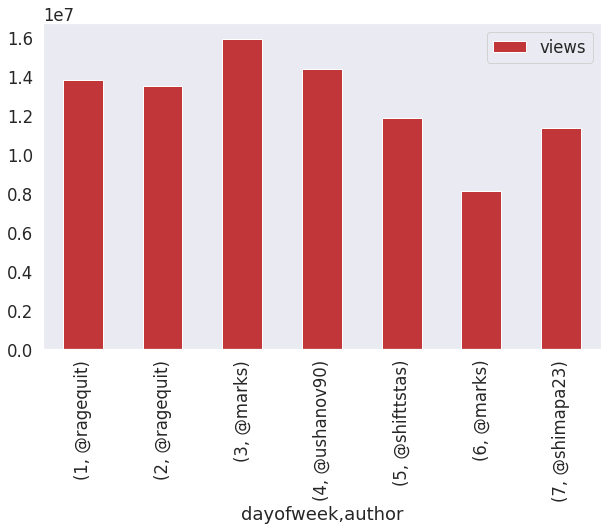

In [282]:
# Ваш код тут
data = df.groupby(['dayofweek', 'author']).sum().sort_values(by='views', ascending=False).groupby('dayofweek').head(10).sort_values(by=["dayofweek", "views"])
d = data.views.reset_index().groupby('dayofweek')['views', 'author'].max().set_index('author', append=True)
data.views.plot.bar(by="dayofweek", figsize=(30, 25))
d.plot.bar(stacked=True)

### <span style="color:red; font-size:1.5em;">Завдання 5</span>

**Проаналізуйте день тижня та пору дня, за яких автори публікують свої статті найчастіше:**

**Для варіантів 1-5:**

Чи правда, що автори зазвичай пишуть щосуботи вдень (12:00 - 18:59)?

**Для варіантів 6-10:**

Чи правда, що автори зазвичай пишуть щопонеділка ввечері (19:00 - 23:59)?

**Для варіантів 11-15:**

Чи правда, що автори зазвичай пишуть щонеділі вночі (00:00 - 04:59)?

**Для варіантів 16-20:**

Чи правда, що автори зазвичай пишуть щосереди зранку (05:00 - 11:59)?

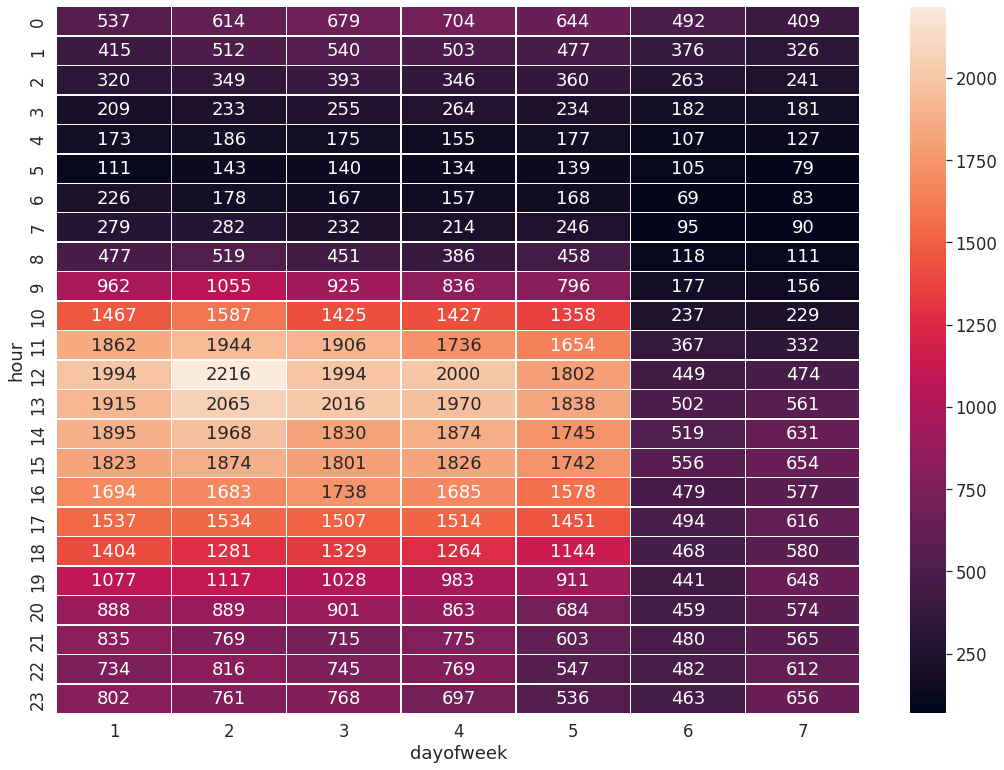

In [326]:
# Ваш код тут
data = df.groupby(['dayofweek', 'hour'])['published'].count().reset_index(name="count")
writes = data.pivot_table(
                        index='hour', 
                        columns='dayofweek', 
                        values='count',
                        aggfunc=sum).fillna(0).applymap(int)
plt.figure(figsize=(18,13))
sns.heatmap(writes, annot=True, fmt="d", linewidths=.5);